# Machine Learning Coding Overview

## Summary

This notebook demonstrates various machine learning techniques, including:

1. **Data Analysis and Preprocessing**: Loading and cleaning, balancing and preparing data for modeling as well as dimensionality reduction, visualization and Exploratory Data Analysis (EDA).
2. **Model Building and Training**: Creating and training machine learning models and classifiers, such as linear regression, clustering algorithms, decision trees, SVMs, and ensemble methods such as random forest, boosting and bagging.
3. **Model Evaluation**: Evaluating model performance using metrics like accuracy, precision, recall, ROC-AUC and confusion matrices.
4. **Hyperparameter Tuning**: Optimizing model parameters to improve performance using grid-search and cross validation.
5. **Prediction and Interpretation**: Making predictions with the fitted models and interpreting the results.



# _00_Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/path_to_drive'

# _01_Imports

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.patches import Ellipse 
# plt.rcParams['figure.figsize'] = [w, h]
# plt.figure(figsize=(5,5))

# --- preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

# --- pipeline ---
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# --- dimensionality reduction ---
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS,LocallyLinearEmbedding, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- clustering ---
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import sklearn.mixture as mix
from sklearn.metrics import silhouette_samples

# --- classification ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# --- regression ---
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# --- distances ---
from scipy.spatial.distance import pdist, squareform

# --- evaluation ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # regression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score # (tpr / sensitivity)
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

#--- hyperparamter tuning ---
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

"""
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp) # (tnr)
intersection_over_union = tp / (tp + fp + fn)
"""
None

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# _02_Pre Processing

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Random under-sampling:
1    212
0    212
Name: y, dtype: int64


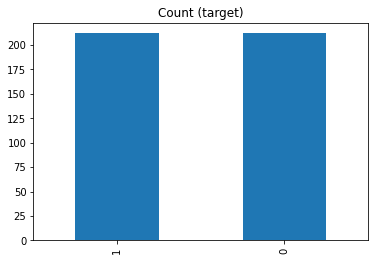

In [ ]:
# from sklearn.preprocessing import StandardScaler, PowerTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- Train Test Split ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

df = X_train
# --- Standard Scaler ---
scaler = StandardScaler() # center and scale -> Z = (x - mu)/std
scaler.fit(df)
scaled_df = scaler.transform(df)

# --- Robust Scaler ---
scaler = RobustScaler().fit(df)
scaled_df = scaler.transform(df)

# --- Power Transformer --- 
scaler = PowerTransformer() # Make Data more gaussian like
scaler.fit(df)
scaled_df = scaler.transform(df)

# -- Balance unbalanced Dataset ---
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
plt.hist(y_rus)

# -- Balance unbalanced Dataset manually wiht n_class_0 < n_class_1 ---
df = pd.DataFrame(data=X, columns = data.feature_names)
df['y'] = y
count_class_0, count_class_1 = sum(df.y == 0), sum(df.y == 1)
# print(count_class_0)
# print(count_class_1)

# Divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]
df_class_1_under = df_class_1.sample(count_class_0) # donwnsampling 
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

# --- in pileline ---
# pipe = make_pipeline(StandardScaler(),  
#                      LogisticRegression(random_state=1, solver='liblinear'))
# pipe.fit(X)

# _03_Dimensionality Reduction


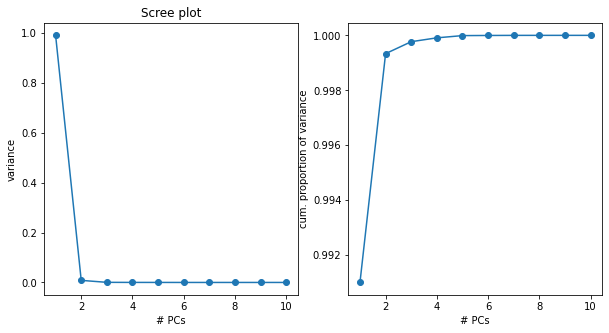

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# ---
# from sklearn.decomposition import PCA, RandomizedPCA, SparsePCA, KernelPCA
# from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding, Isomap
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# -- reduce dataset --
_, df, _, _ = train_test_split(df, y, test_size=0.2)

# --- [MDS] Multi dimensional scaling ---
mds = MDS(n_components=2).fit_transform(df)
mds = pd.DataFrame({'V1': mds[:, 0], 'V2': mds[:, 1]})

# --- [LLE] Local linear embedding ---
lle = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(df)
lle = pd.DataFrame({'V1': lle[:, 0], 'V2': lle[:,1]})

# --- [isomap] ---
iso = Isomap(n_components=2).fit_transform(df)
iso = pd.DataFrame({'V1': iso[:, 0], 'V2': iso[:,1]})

# --- [LDA] Linear Discriminant Analysis ---
# is actually a classifier which incorporates dimensionality direction
# lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

# --- [t-SNE] t- stocastic neighbour embedding ---
tsne = TSNE(n_components=2).fit_transform(df)
tsne = pd.DataFrame({'V1': tsne[:, 0], 'V2': tsne[:, 1]})

# --- [PCA] principal component analysis ---
# instead of setting the number of principal components one could also set the variance ratio instead: pca = PCA(n_components=0.95)
pca = PCA(n_components=10)
projected = pca.fit_transform(df)
components = pca.components_
var = pca.explained_variance_ratio_ # the amount of variance that each PC explains
reconstructed = pca.inverse_transform(projected)
pca_df = pd.DataFrame({'V1': projected[:, 0], 'V2': projected[:, 1]})
# other more robust variants of PCA: RandomizedPCA, SparsePCA

# --- [Kernel-PCA] ---
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
# if inverse transform is necessary: set fit_inverse_transform=True (default=False)
k_pca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
k_pca_df = k_pca.fit_transform(df )
df_back = k_pca.inverse_transform(k_pca_df)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(1, len(var)+1), var, '-o')
plt.xlabel("# PCs")
plt.ylabel("variance")
plt.title("Scree plot")

plt.subplot(122)
plt.plot(np.arange(1, len(var)+1), np.cumsum(var)/sum(var), '-o')
plt.xlabel("# PCs")
plt.ylabel("cum. proportion of variance")
plt.show()

# _04_Visualization / Exploration

shape: (150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Missing values: False
Number of missing values: 0
---------------
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


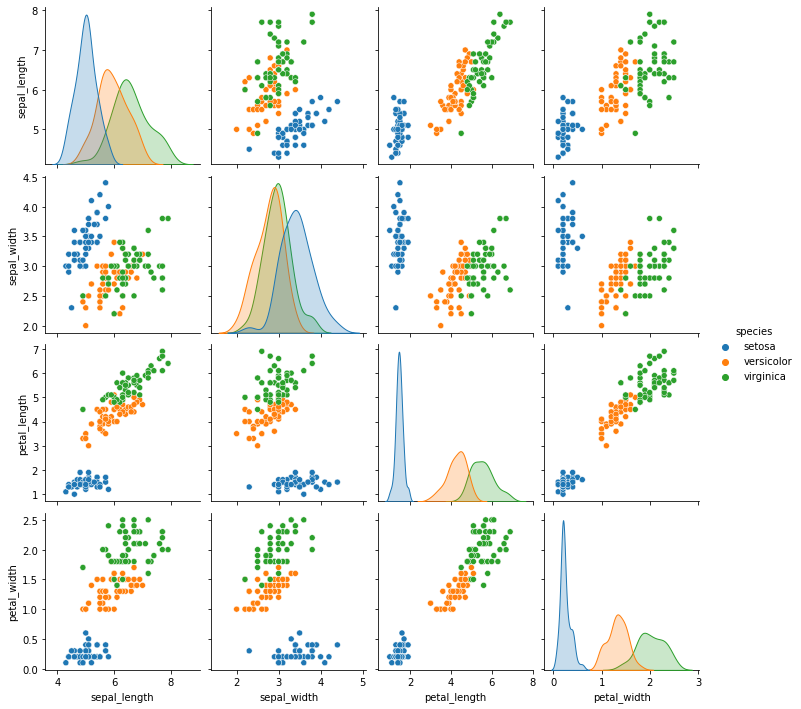

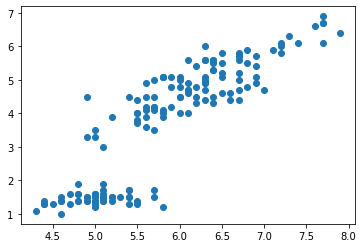

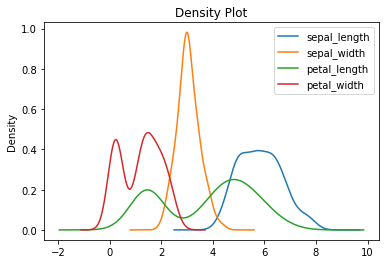

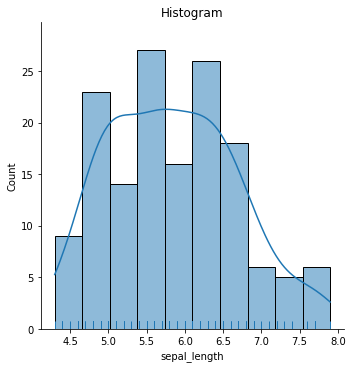

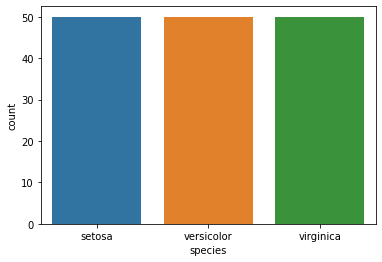

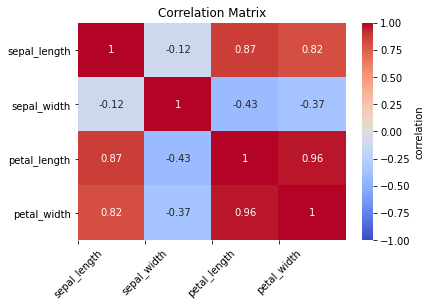

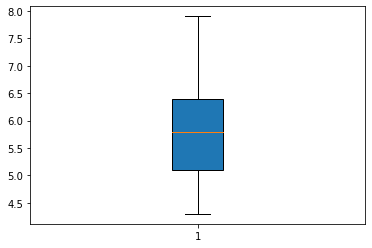

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")

# --- Explore --
print("shape:", df.shape) # (n_observations, n_attributes)
print(df.columns) # column names
print("Missing values:",df.isnull().any().any()) # check for missing values
print("Number of missing values:", df.isnull().sum().sum()) # number of missing values
df.head(n=10) # show first 10 observation
print("---------------")
print(df['sepal_length'].describe()) # get mean / std / etc of array

# --- pairs plot ---
sns.pairplot(data= df, hue="species") # hue: target variable
plt.show()

# --- scatterplot ---
plt.scatter(x=df["sepal_length"], y=df['petal_length'])
plt.show()

# --- Density plot of all numerical features ---
df.plot.kde() 
plt.title("Density Plot")
plt.show()

# -- Histogram / Densiy Plot ---
sns.displot(df["sepal_length"], kde=True, rug=True, bins = 10)
plt.title("Histogram")
# plt.hist(df[""])
# sns.kdeplot(df['sepal_length']) # only density
plt.show()

# --- barplot ---
sns.countplot(x=df['species'])
# plt.bar(idx, counts)
plt.show()

# --- Heatmap of correlations (correlation matrix) ---
sns.heatmap(df.corr(), vmin = -1, vmax=1, annot=True, cmap="coolwarm", cbar_kws={'label': 'correlation'})  
plt.xticks(range(4), df.columns.drop(labels=['species']), rotation=45)
plt.title("Correlation Matrix")
plt.show()

# --- Boxplot ----
plt.boxplot(df['sepal_length'], patch_artist=True)
plt.show()

# _05_Clustering

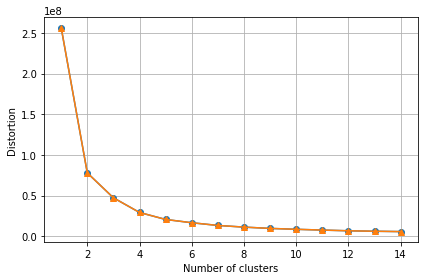

K-Means:



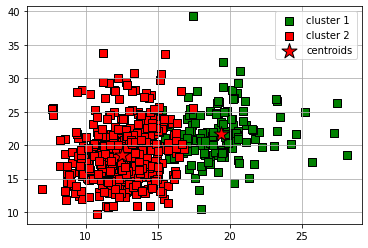

2


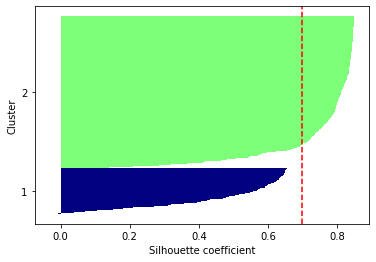


eps=20.0
Number of clusters: 12
Cluster sizes: [250  43 236   3   3   5   7   4   9   3   3   3]

eps=24.0
Number of clusters: 11
Cluster sizes: [210 308   3  16   4   3  11   4   4   3   3]

eps=28.0
Number of clusters: 8
Cluster sizes: [192 324   4  34   5   4   3   3]

eps=32.0
Number of clusters: 11
Cluster sizes: [166 368   4   4   6   4   3   4   3   3   4]

eps=36.0
Number of clusters: 14
Cluster sizes: [147 375   4   4   4   4   6   5   3   3   3   4   3   4]

eps=40.0
Number of clusters: 16
Cluster sizes: [124 387   3   4   5   4   5   6   3   7   3   3   4   5   3   3]

eps=44.0
Number of clusters: 14
Cluster sizes: [106 389   8   3   4   6  16  12   6   7   3   3   3   3]

eps=48.0
Number of clusters: 10
Cluster sizes: [101 419   8   5   6  15   6   3   3   3]

eps=52.0
Number of clusters: 9
Cluster sizes: [ 91 422   8   7   8  18   9   3   3]

eps=56.0
Number of clusters: 8
Cluster sizes: [ 79  21 423   8   7   8  18   5]

eps=60.0
Number of clusters: 10
Cluster sizes: [ 6

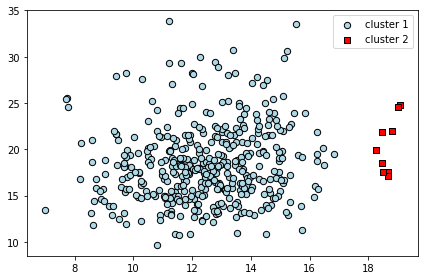

8


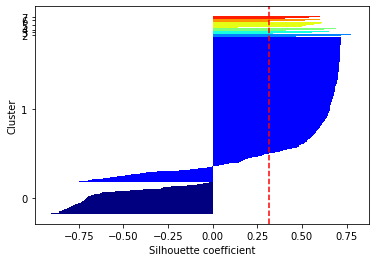

GMM:

2


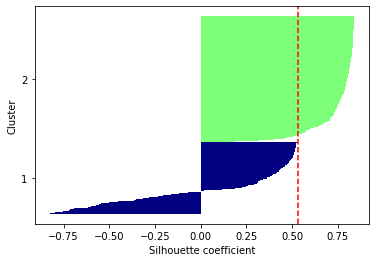

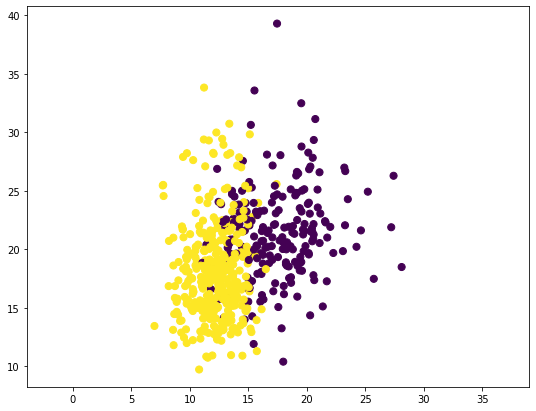

In [ ]:
# --- clustering ---
# from sklearn.cluster import KMeans, MeanShift, DBSCAN
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_samples
# from matplotlib import colors as mcolors
# import pandas as pd
# import numpy as np
# from matplotlib import cm
# import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse 
# import sklearn.mixture as mix
from sklearn.datasets import load_breast_cancer
n_draws = 500
sigma = .7
random_state = 0
dot_size = 50
cmap = 'viridis'

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
ColorNames=list(colors.keys())
HSV=colors.values()


# --- load data ---
data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- Silhouette plot for evaluation ---
# silhouette score from [-1, 1], we want to maximize the score for each cluster
def silhoutte_plot(X, y_pred, nb_clusters):
    cluster_labels = np.unique(y_pred)
    n_clusters = nb_clusters
    print(n_clusters)
    silhouette_vals = silhouette_samples(X, y_pred, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_pred == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

# --- K-Means ---

def PlotClusters(X,y,km):
    
    for ClusterNumber in range(km.n_clusters):
        plt.scatter(X[y == ClusterNumber, 0],
                X[y == ClusterNumber, 1],
                s=50, c=ColorNames[ClusterNumber+1],
                marker='s', edgecolor='black',
                label='cluster {0}'.format(ClusterNumber+1))
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()


# Determine obtimal k with elbow plot
distortions = []
ScoreList   = []
maxNumberOfClusters=15

for i in range(1, maxNumberOfClusters):
    km = KMeans(n_clusters=i, 
                init='k-means++', # ++ -> speed up convergence (other option: random) -> place the initial centroids far away from each other via the k-means++ algorithm
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)  # within-cluster sum-of-squares sum((x -mu)^2)
    ScoreList.append(-km.score(X))
    
    
plt.plot(range(1, maxNumberOfClusters), distortions, marker='o')
plt.plot(range(1, maxNumberOfClusters), ScoreList, marker='^')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.grid(True)
plt.show()

# decide on optimal k from elbow plot
k=2

# kmeans model
km = KMeans(n_clusters=k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

# predictions
km.fit(X)
y_pred = km.predict(X)
centers = km.cluster_centers_

# or fit and predict in one:
y_pred = km.fit_predict(X)

# plot predictions 
print('K-Means:\n')
PlotClusters(X, y_pred, km)

# evaluate k-mans with silhouette plot
silhoutte_plot(X, y_pred, k)

# --- [DBScan] density based ---

db = DBSCAN(eps=60, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
n_clusters_db = len(np.unique(y_db))

# try different epsilon
for eps in np.linspace(20,60,11):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

print('DBScan:\n')
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

silhoutte_plot(X, y_db, n_clusters_db)
# --- GMM ---
        
def plot_gmm(gmm, X, label=True, ax=None):
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
gmm = mix.GaussianMixture(n_components=2, random_state=0)
print('GMM:\n')
labels = gmm.fit(X).predict(X)
silhoutte_plot(X, labels, k)
plot_gmm(gmm, X)


# _05_Hierarchical_Clustering

Hierarchical clustering on condensed distance matrix

             row label 1  row label 2     distance  no. of items in clust.
cluster 1          287.0        336.0     3.815967                     2.0
cluster 2          106.0        420.0     4.116643                     2.0
cluster 3           55.0        251.0     4.933610                     2.0
cluster 4          107.0        334.0     5.052243                     2.0
cluster 5          457.0        543.0     5.467476                     2.0
...                  ...          ...          ...                     ...
cluster 564        212.0       1126.0  1344.058634                    10.0
cluster 565       1129.0       1132.0  1475.622358                    19.0
cluster 566       1130.0       1131.0  2316.595598                   549.0
cluster 567        461.0       1133.0  2455.000024                    20.0
cluster 568       1134.0       1135.0  4739.088806                   569.0

[568 rows x 4 columns]


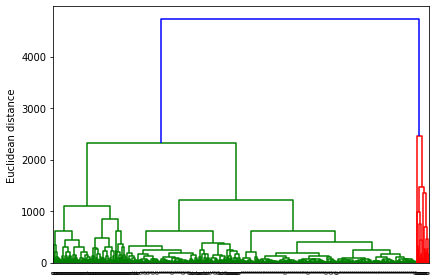


Hierarchical clustering on normal input data

             row label 1  row label 2     distance  no. of items in clust.
cluster 1          287.0        336.0     3.815967                     2.0
cluster 2          106.0        420.0     4.116643                     2.0
cluster 3           55.0        251.0     4.933610                     2.0
cluster 4          107.0        334.0     5.052243                     2.0
cluster 5          457.0        543.0     5.467476                     2.0
...                  ...          ...          ...                     ...
cluster 564        212.0       1126.0  1344.058634                    10.0
cluster 565       1129.0       1132.0  1475.622358                    19.0
cluster 566       1130.0       1131.0  2316.595598                   549.0
cluster 567        461.0       1133.0  2455.000024                    20.0
cluster 568       1134.0       1135.0  4739.088806                   569.0

[568 rows x 4 columns]


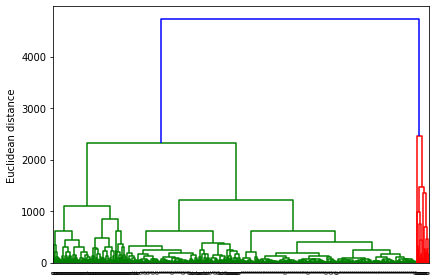

Cluster labels agglomerative clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# --- hierarchical clustering ---

# import pandas as pd
# import numpy as np
# from matplotlib import cm
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer

# --- load data ---
data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- linkage ---
# 1. solution: data = condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
print("Hierarchical clustering on condensed distance matrix\n")
print(pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])]))
row_dendr = dendrogram(row_clusters, 
                       labels=y
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# 2. solution: data = Input matrix
row_clusters = linkage(df.values, method='complete', metric='euclidean')
print("\nHierarchical clustering on normal input data\n")
print(pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])]))

row_dendr = dendrogram(row_clusters, 
                       labels=y
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# --- additional visualization: plot dendrogram attached to heatmap (looks weird on this data) ---
# # plot row dendrogram
# fig = plt.figure(figsize=(8, 8), facecolor='white')
# axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# # note: for matplotlib < v1.5.1, please use orientation='right'
# row_dendr = dendrogram(row_clusters, orientation='left')

# # reorder data with respect to clustering
# df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# axd.set_xticks([])
# axd.set_yticks([])

# # remove axes spines from dendrogram
# for i in axd.spines.values():
#     i.set_visible(False)

# # plot heatmap
# axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
# cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
# fig.colorbar(cax)
# axm.set_xticklabels([''] + list(df_rowclust.columns))
# axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.show()

# --- agglomerative clustering ---

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels agglomerative clustering: %s' % labels)



# _06_Evaluation (Classification)

[AUC] Area under Curve: 0.9659024103468549


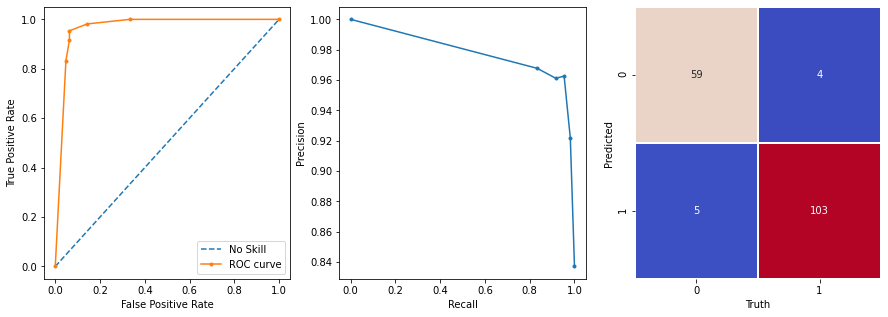

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



,Mertic:,Result:
0,accuracy,0.947368
1,recall (tpr or sensitivity),0.962617
2,precision,0.953704
3,f1,0.958140
4,specificity,0.921875
5,intersection_over_union,0.919643


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# --- evaluation libraries ---
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import precision_score, recall_score # (tpr or sensitivity)
# from sklearn.metrics import f1_score, accuracy_score
# from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split / train / predict ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test) # prediciton probabilities

# -------------------------------- Evaluation --------------------------------
# --- [ROC-curve] receiver operating characteristic curve ---
plt.figure(figsize=(15,5))
plt.subplot(131)
fpr, tpr, th = roc_curve(y_test, y_proba[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

print("[AUC] Area under Curve:", roc_auc_score(y_test, y_proba[:,1]))

# --- [Precision Recall] ---
plt.subplot(132)
precision, recall, th = precision_recall_curve(y_test, y_proba[:,1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

# --- Confusion Matrix ---
plt.subplot(133)
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True, fmt='d', cbar=False, cmap="coolwarm",  linewidth=1)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

# -- preformance metrics ---
print(classification_report(y_test, y_pred, digits=2)) # mostly sufficient

def cmat_metrics(cmat, idx=1):
  """
  Make sure to have predicted on y-axis
  and true values on x-axis!
  otherwise use: np.transpose(cmat)
  """
  tp = cmat[idx, idx]
  fp = sum(cmat[idx,:]) - tp
  tn = np.sum(cmat) - np.sum(cmat[:,idx]) - np.sum(cmat[idx,:]) + tp
  fn = sum(cmat[:,idx]) - tp
  return tp, fp, tn, fn

cmat = confusion_matrix(y_test, y_pred) 
# cmat = np.array([[tn, fp], [fn, tp]]) # or bigger dimesnion
tp, fp, tn, fn = cmat_metrics(cmat)

accuracy = (tp+tn)/(tp+tn+fp+fn)              # = accuracy_score(y_test, y_pred)
recall = tp/(tp+fn)                           # = recall_score(y_test, y_pred) -> tpr or sensitivity 
precision = tp/(tp+fp)                        # = precision_score(y_test, y_pred)
f1 = 2*recall*precision/(recall + precision)  # = f1_score(y_test, y_pred) 
specificity = tn / (tn+fp)                    # (tnr)
intersection_over_union = tp / (tp + fp + fn)

pd.DataFrame({"Mertic:": ["accuracy", "recall (tpr or sensitivity)", "precision", "f1", "specificity", "intersection_over_union"],
              "Result:": [accuracy, recall, precision, f1, specificity, intersection_over_union]})

# _07_Evaluation (Regression)

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # regression
# from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# --- data generation / train / predict ---
X, y, coef = make_regression(n_samples=500, n_features=1,
                                    n_informative=1, noise=5,
                                    coef=True, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# --- preformance metrics ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # y_pred explaines r2*100 % of y_true
mean_relative_deviation = np.mean(np.abs(np.abs(y_test - y_pred)/y_test))

pd.DataFrame({"Mertic:": ["mean absolute error", "mean squared error", "r2 score", "mean_relative_deviation"],
              "Result:": [mae, mse, r2, mean_relative_deviation]})

,Mertic:,Result:
0,mean absolute error,3.727329
1,mean squared error,22.967760
2,r2 score,0.996675
3,mean_relative_deviation,0.204818


# _08_KNN

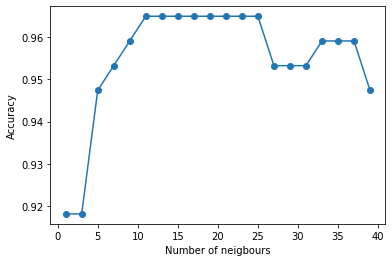

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# --
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split / train / predict ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Determine obtimal k --
cost =[]
ks = np.arange(1, 40, 2) # should be odd to avoid ties in majority votes
for k in ks: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cost.append(accuracy_score(y_test, y_pred))

# choose high accuracy with low complexity (trade of)
plt.plot(ks, cost, '-o') 
plt.xlabel("Number of neigbours") 
plt.ylabel("Accuracy")
plt.show()

# _09_Decision Tree

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.95      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



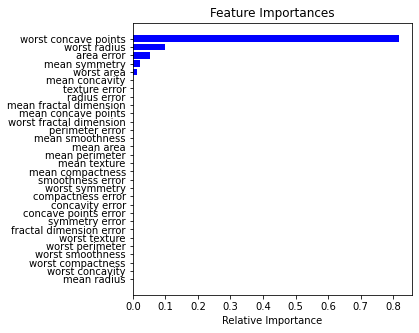

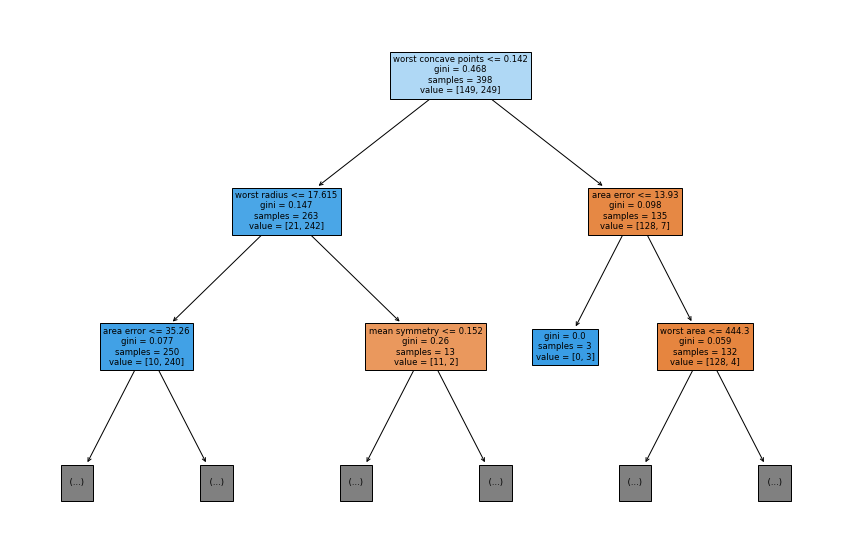

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# --
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)

# fit model 
clf = DecisionTreeClassifier(min_samples_leaf = 1, criterion = 'gini', max_depth = 3)
clf = clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# relative feature importances
importances = clf.feature_importances_  
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Plot tree
plt.figure(figsize=(15,10))
plot_tree(clf, max_depth=2, filled=True, feature_names=data.feature_names)
plt.show()

# _10_Bagging / Random Forrest




In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# --
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
labels=data.feature_names

#--- split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# ============ Bagging ==================
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=None), 
                            max_samples=0.5,
                            n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ============ Random Forrest ==================
model = RandomForestClassifier(n_estimators=100, criterion='gini', oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report( y_test, y_pred))
print("OOB score:", model.oob_score_)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

OOB score: 0.9560439560439561


# _11_Boosting

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



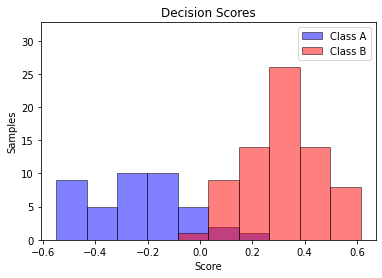

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# --
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
labels=data.feature_names

#--- split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)    

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                          algorithm="SAMME",
                          n_estimators=300)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report( y_test, y_pred))

# ----- 
d_fun = model.decision_function(X_test)
plot_range = (d_fun.min(), d_fun.max())
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
for i, n, c in zip(range(2), class_names, plot_colors):
        plt.hist(d_fun[y_test == i],
                 bins=10,
                 range=plot_range,
                 facecolor=c,
                 label='Class %s' % n,
                 alpha=.5,
                 edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.show()

# _12_Grid Search / Cross Validation

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
labels=data.feature_names

#--- scaling data for convergence ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

#--- split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#--- random model ---
model = LogisticRegression(random_state=1, solver='liblinear')

#--- K Fold ---
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for (train, val) in (kfold):
    model.fit(X_train[train], y_train[train])
    scores.append(model.score(X_train[val], y_train[val]))
# print("K Fold accuracy scores:", scores)

#--- Cross Validation --- 
scores = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

# print('CV accuracy scores: %s' % scores)

#--- tuning hyperparameters (for regularization) using grid search ---
print("Estimator Parameters for Hypertuning:", model.get_params().keys())
param_grid = [{'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
               'penalty': ['l1','l2']}]

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
results = gs.cv_results_
print("Best Score GS:", gs.best_score_)
print("Best Parameters GS:", gs.best_params_)
print("Best Estimator GS:", gs.best_estimator_)

Estimator Parameters for Hypertuning: dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])
Best Score GS: 0.9802898550724638
Best Parameters GS: {'C': 0.1, 'penalty': 'l2'}
Best Estimator GS: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


# _13_Pipeline

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import PCA
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score
#from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)

# --- standard pipeline /w standard scaling (preprocessing) & LogisticRegression (model) ---
pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=1, solver='liblinear'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print("training score: %.3f " % pipe_lr.score(X_train, y_train))
print("test score: %.3f " % pipe_lr.score(X_test, y_test))

# --- standard PCA pipeline ---
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train,y_train)
pred_test_std = std_clf.predict(X_test)
print('\nPrediction accuracy with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test,pred_test_std)))

# --- extract model from pipeline ---
log_reg = pipe_lr.named_steps['standardscaler']
clf = pipe_lr.named_steps[]
PCA_ = std_clf.named_steps['pca']

# --- alternative ---
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

training score: 0.990 
test score: 0.977 

Prediction accuracy with PCA
89.47%



# _14_SVM


In [ ]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)
# --- split ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)

#--- SVM ---
#kernel=['linar', 'poly', 'rbf']
C = 0.6
svc = SVC(kernel='linear', C=C).fit(X_train,y_train)

#--- get predictions ---
ypred = svc.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, ypred))

#--- get support vectors ---
print('Support Vetors:', svc.support_vectors_)

#--- get support vector indices ---
print('Support Vector Indices:', svc.support_)

# --- optional: grid search for C and gamma ---
param_grid = dict(gamma=np.logspace(-3, 3, 7), C=np.logspace(-3, 3, 7))
model = SVC(kernel='rbf')
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Accuracy: 0.953216
Support Vetors: [[1.499e+01 2.520e+01 9.554e+01 ... 2.899e-02 1.565e-01 5.504e-02]
 [1.626e+01 2.188e+01 1.075e+02 ... 1.047e-01 2.736e-01 7.953e-02]
 [1.277e+01 2.247e+01 8.172e+01 ... 9.331e-02 2.829e-01 8.067e-02]
 ...
 [1.366e+01 1.913e+01 8.946e+01 ... 1.407e-01 2.744e-01 8.839e-02]
 [1.495e+01 1.877e+01 9.784e+01 ... 8.405e-02 2.852e-01 9.218e-02]
 [1.453e+01 1.934e+01 9.425e+01 ... 9.594e-02 2.471e-01 7.463e-02]]
Support Vector Indices: [ 28  79  81 120 129 151 157 166 167 190 209 216 264 279 284 344 349 364
 379 393  11  15  53  68  80  96 111 138 156 161 176 195 211 242 247 255
 266 278 327 353 365 376 377 380]
The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.92


# _15_Naive Bayes

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# --
# from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split / train / predict ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



# _16_Naive Bayes (Binary)

In [ ]:
import pandas as pd
import numpy as np

X = pd.DataFrame({
    "heavy": [0, 0, 1, 1, 0, 0, 0, 1],
    "smelly": [0, 0, 1, 0, 1, 0, 0, 1],
    "dotted": [0, 1, 0, 0, 1, 1, 0, 0],
    "lammelar": [0, 0, 1, 1, 0, 1, 1, 0]
})
Y = np.array([ 0, 0, 0, 1, 1, 1, 1, 1])

sample = np.array([1, 1, 1, 1]) # sample to predict

prior_1 = sum(Y == 1)/len(Y)
prior_0 = 1 - prior_1
X_1 = X[Y == 1]
X_0 = X[Y == 0]
L_1 = L_0 = []
L1 = L0 = 1



for i, col in enumerate(X.columns):
  l1 = sum(X_1[col] == sample[i])/len(X_1)
  l0 = sum(X_0[col] == sample[i])/len(X_0)
  L1 *= l1
  L0 *= l0
  L_1.append(l1)
  L_0.append(l0)

evidence = L1*prior_1 + L0*prior_0
L1
(L1*prior_1)/(L0*prior_0)

out = pd.DataFrame({
    "Names:": ["P(y=0)", "P(y=1)", "Likelihood(y=0)", "Likelihood(y=1)", 
               "f(y=0)", "f(y=1)", "likelihood ratio", "Evidence",
               "P(y=0|X)", "P(y=1|x)"],
    "Results:": [prior_0, 
                 prior_1, 
                 L0, L1, 
                 L1*prior_1, 
                 L0*prior_0, 
                 (L1*prior_1)/(L0*prior_0), 
                 evidence, 
                 (prior_0*L0)/evidence, 
                 (prior_1*L1)/evidence]
})
out

,Names:,Results:
0,P(y=0),0.375000
1,P(y=1),0.625000
2,Likelihood(y=0),0.012346
3,Likelihood(y=1),0.038400
4,f(y=0),0.024000
5,f(y=1),0.004630
6,likelihood ratio,5.184000
7,Evidence,0.028630
8,P(y=0|X),0.161708
9,P(y=1|x),0.838292


# _17_Full Workflow

shape: (569, 30)
Missing values: False
Number of missing values: 0


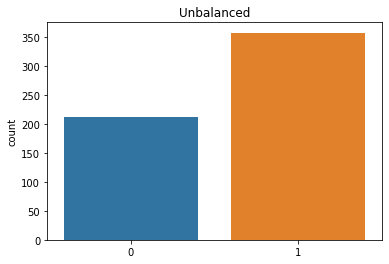

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------- Grid Search Results: -------------
Best Score GS: 0.969655172413793
Best Parameters GS: {'pca__n_components': 4, 'svc__C': 1.0, 'svc__gamma': 0.1}
Best Estimator GS: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=4,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
---------- Evaluation: -------------
              precision    recall  f1-score   support

           0

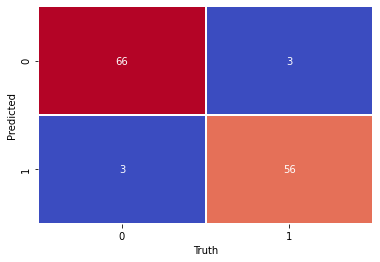

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import load_breast_cancer


# -- load data --
data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- Explore ---
print("shape:", df.shape) # (n_observations, n_attributes)
print("Missing values:",df.isnull().any().any()) # check for missing values
print("Number of missing values:", df.isnull().sum().sum()) # number of missing values

# --- visualize ---
sns.countplot(x=y)
plt.title("Unbalanced")
plt.show()  

# -- Balance unbalanced Dataset ---
#### !!!only balance it it serves the objective!!! ###
rus = RandomUnderSampler(return_indices=True)
X, y, id_rus = rus.fit_sample(X, y)
df = pd.DataFrame(data=X, columns = data.feature_names)

# --- split ---
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 0)

# --- pipeline with scaling dimensionality reduction and SVM clf  ---
model = make_pipeline(StandardScaler(), PCA(), SVC())
model.get_params().keys() # show parameter 

# --- parameter grid / Grid search with 10 - fold cross validation ---
param_grid = [{
    'pca__n_components': [2, 3, 4],
    'svc__C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'svc__gamma': np.logspace(-3, 3, 7)
    }]

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

# --- get results ---
print("---------- Grid Search Results: -------------")
results = gs.cv_results_
print("Best Score GS:", gs.best_score_)
print("Best Parameters GS:", gs.best_params_)
best_model = gs.best_estimator_
print("Best Estimator GS:", best_model)

# -- evaluate --
print("---------- Evaluation: -------------")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# --- Confusion Matrix ---
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True, fmt='d', cbar=False, cmap="coolwarm",  linewidth=1)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()